In [1]:
# libraries used

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns
import datetime
import math

%matplotlib inline

# needed for treemap graphic
!pip install squarify 
import squarify

print("loaded libraries")

loaded libraries


In [2]:
# load up csv files

github_url = "https://raw.githubusercontent.com/werntzp/hockey-stats/master/"

df_games = pd.read_csv(github_url + "games.csv") 
df_shots = pd.read_csv(github_url + "shots.csv") 
df_goals = pd.read_csv(github_url + "goals.csv") 
df_periods = pd.read_csv(github_url + "periods.csv")

print("loaded csv files")

loaded csv files


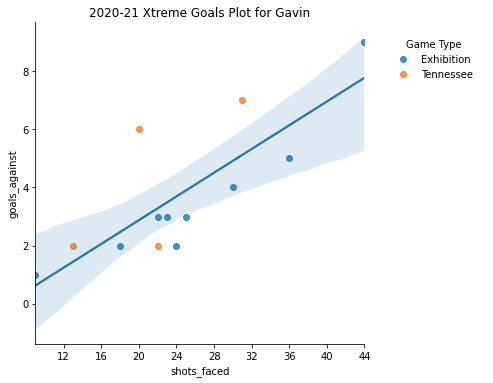

In [3]:
# plot linear regression of Gavin's goals and shots to look for games where he out/under performed 
# against expectations

# create a new data frame with totals
dfx = pd.DataFrame(columns=["game",	"goals_against",	"shots_faced", "league"])

# just get games where Gavin was in net 
games = df_games[df_games.goalie == "g"].game

# loop through those games to pull out opponent shots and total up 
for g in games: 
  league = df_games[df_games.game == g].iloc[0,8]
  # total goals (but may include empty net goals which I don't want)
  all_goals = df_games[df_games.game == g].oppscore.iloc[0]
  # total up goals based on goal type 
  en_goals = df_goals[(df_goals.game == g) & (df_goals.team == 'o') & (df_goals.type == 'en')].shape[0]
  goals = (all_goals - en_goals)
  shots = df_shots[df_shots.game == g].opp_p1.iloc[0] + df_shots[df_shots.game == g].opp_p2.iloc[0] + df_shots[df_shots.game == g].opp_p3.iloc[0] + df_shots[df_shots.game == g].opp_ot.iloc[0]
  shots = (shots - en_goals)
  if (g == 60):
    # hard code in numbers for game 60 since Gavin and Logan split it
    dfx = dfx.append({'game': g, 'goals_against': 0.0, 'shots_faced': 3.0, 'league': league} , ignore_index=True)  
  else:
    dfx = dfx.append({'game': g, 'goals_against': float(goals), 'shots_faced': float(shots), 'league': league} , ignore_index=True)  

graph = sns.lmplot(x='shots_faced', y='goals_against', hue='league', data=dfx, fit_reg=False, legend_out=True)
ax = sns.regplot(x='shots_faced', y='goals_against', data=dfx, scatter=False) 

# title
new_title = 'Game Type'
graph._legend.set_title(new_title)
graph._legend.set_bbox_to_anchor((1.2, .9))
# replace labels
new_labels = ['Exhibition', 'Tennessee']
for t, l in zip(graph._legend.texts, new_labels): 
  t.set_text(l)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('2020-21 Xtreme Goals Plot for Gavin')

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))


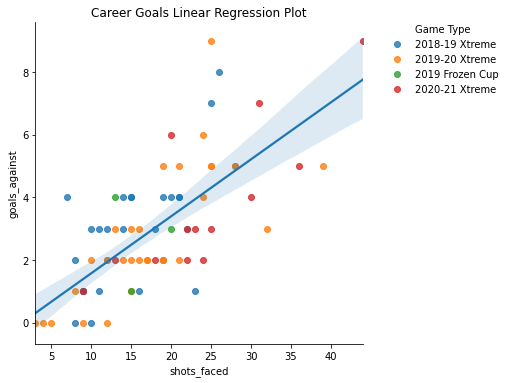

In [4]:
# map goals/shots from all of Gavin's seasons 

# create a new data frame with totals
dfx = pd.DataFrame(columns=["game",	"goals_against",	"shots_faced", "game_type"])

# 2018-19 
dfs = pd.read_csv(github_url + "gavin_2018-19.csv") 
games = dfs.game
for g in games: 
  game_type = "18"
  goals = dfs[dfs.game == g].goals.iloc[0]
  shots = dfs[dfs.game == g].shots.iloc[0]
  dfx = dfx.append({'game': g, 'goals_against': float(goals), 'shots_faced': float(shots), 'game_type': game_type} , ignore_index=True)  

# 2019-20
dfs = pd.read_csv(github_url + "gavin_2019-20.csv") 
games = dfs.game
for g in games: 
  game_type = "19"
  goals = dfs[dfs.game == g].goals.iloc[0]
  shots = dfs[dfs.game == g].shots.iloc[0]
  dfx = dfx.append({'game': g, 'goals_against': float(goals), 'shots_faced': float(shots), 'game_type': game_type} , ignore_index=True)  

# for frozen cup, data set already prepped 
dfs = pd.read_csv(github_url + "gavin_frozen_cup.csv") 
games = dfs.game
for g in games: 
  game_type = "fc"
  goals = dfs[dfs.game == g].goals.iloc[0]
  shots = dfs[dfs.game == g].shots.iloc[0]
  dfx = dfx.append({'game': g, 'goals_against': float(goals), 'shots_faced': float(shots), 'game_type': game_type} , ignore_index=True)  

# 2020-21   
games = df_games[df_games.goalie == "g"].game

# loop through those games to pull out opponent shots and total up 
for g in games: 
  game_type = "20"
  # total goals (but may include empty net goals which I don't want)
  all_goals = df_games[df_games.game == g].oppscore.iloc[0]
  # total up goals based on goal type 
  en_goals = df_goals[(df_goals.game == g) & (df_goals.team == 'o') & (df_goals.type == 'en')].shape[0]
  goals = (all_goals - en_goals)
  shots = df_shots[df_shots.game == g].opp_p1.iloc[0] + df_shots[df_shots.game == g].opp_p2.iloc[0] + df_shots[df_shots.game == g].opp_p3.iloc[0] + df_shots[df_shots.game == g].opp_ot.iloc[0]
  shots = (shots - en_goals)
  dfx = dfx.append({'game': g, 'goals_against': float(goals), 'shots_faced': float(shots), 'game_type': game_type} , ignore_index=True)  

graph = sns.lmplot(x='shots_faced', y='goals_against', hue='game_type', data=dfx, fit_reg=False, legend_out=True)
ax = sns.regplot(x='shots_faced', y='goals_against', data=dfx, scatter=False) 

# title
new_title = 'Game Type'
graph._legend.set_title(new_title)
graph._legend.set_bbox_to_anchor((1.2, .9))
# replace labels
new_labels = ['2018-19 Xtreme', '2019-20 Xtreme', '2019 Frozen Cup', '2020-21 Xtreme']
for t, l in zip(graph._legend.texts, new_labels): 
  t.set_text(l)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Career Goals Linear Regression Plot')

for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))



Text(0.5, 1.0, 'Career Goals Swarmplot')

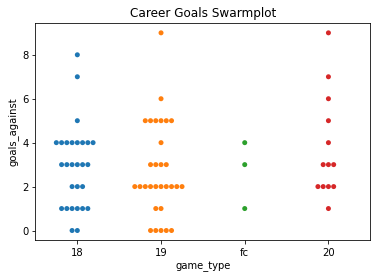

In [5]:
# create a swarm plot for goals over the seasons

ax = sns.swarmplot(x=dfx['game_type'], y=dfx['goals_against'])
ax.set_title("Career Goals Swarmplot")
